In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
dm = pd.read_csv("Graduation_Rate_2018.csv")
dm

,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_CODE,AGGREGATION_NAME,LEA_BEDS,LEA_NAME,NRC_CODE,NRC_DESC,COUNTY_CODE,...,REG_ADV_CNT,REG_ADV_PCT,NON_DIPLOMA_CREDENTIAL_CNT,NON_DIPLOMA_CREDENTIAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
0,2017-18,0,Statewide,0.000000e+00,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,65224,31%,2839,1%,6009,3%,1275,1%,19072,9%
1,2017-18,0,Statewide,0.000000e+00,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,35444,35%,1012,1%,2284,2%,492,0%,7704,8%
2,2017-18,0,Statewide,0.000000e+00,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,29780,28%,1827,2%,3725,4%,783,1%,11368,11%
3,2017-18,0,Statewide,0.000000e+00,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,179,15%,36,3%,52,4%,13,1%,205,17%
4,2017-18,0,Statewide,0.000000e+00,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,3984,11%,721,2%,1796,5%,322,1%,5146,14%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116441,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,0,0%,2,22%,3,33%,0,0%,1,11%
116442,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,-,-,-,-,-,-,-,-,-,-
116443,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,3,9%,2,6%,6,19%,0,0%,2,6%
116444,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,4,27%,0,0%,1,7%,0,0%,0,0%


In [4]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116446 entries, 0 to 116445
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   REPORT_SCHOOL_YEAR          116446 non-null  object 
 1   AGGREGATION_INDEX           116446 non-null  int64  
 2   AGGREGATION_TYPE            116446 non-null  object 
 3   AGGREGATION_CODE            116446 non-null  float64
 4   AGGREGATION_NAME            116446 non-null  object 
 5   LEA_BEDS                    73587 non-null   float64
 6   LEA_NAME                    73587 non-null   object 
 7   NRC_CODE                    112240 non-null  float64
 8   NRC_DESC                    112240 non-null  object 
 9   COUNTY_CODE                 115878 non-null  float64
 10  COUNTY_NAME                 115878 non-null  object 
 11  NYC_IND                     115878 non-null  float64
 12  BOCES_CODE                  111744 non-null  float64
 13  BOCES_NAME    

In [5]:
## 1 Missing data##

In [6]:
total = dm.shape[0]
missing_columns = [colu for colu in dm.columns if dm[colu].isnull().sum() > 0]
for colu in missing_columns:
    null_count = dm[colu].isnull().sum()
    per = (null_count/total) * 100
    print(f"{colu}: {null_count} ({round(per, 3)}%)")
total 

LEA_BEDS: 42859 (36.806%)
LEA_NAME: 42859 (36.806%)
NRC_CODE: 4206 (3.612%)
NRC_DESC: 4206 (3.612%)
COUNTY_CODE: 568 (0.488%)
COUNTY_NAME: 568 (0.488%)
NYC_IND: 568 (0.488%)
BOCES_CODE: 4702 (4.038%)
BOCES_NAME: 4702 (4.038%)


116446

In [7]:
# Now removing the missing data rows in columns

In [8]:
dm =dm.dropna(subset=['COUNTY_CODE','COUNTY_NAME','BOCES_CODE','BOCES_NAME'])
dm

,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_CODE,AGGREGATION_NAME,LEA_BEDS,LEA_NAME,NRC_CODE,NRC_DESC,COUNTY_CODE,...,REG_ADV_CNT,REG_ADV_PCT,NON_DIPLOMA_CREDENTIAL_CNT,NON_DIPLOMA_CREDENTIAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
640,2017-18,3,District,1.010001e+10,ALBANY CITY SCHOOL DISTRICT,NaN,NaN,3.0,Urban-Suburban High Needs,1.0,...,68,10%,22,3%,10,2%,0,0%,163,25%
641,2017-18,3,District,1.010001e+10,ALBANY CITY SCHOOL DISTRICT,NaN,NaN,3.0,Urban-Suburban High Needs,1.0,...,38,11%,9,3%,1,0%,0,0%,70,21%
642,2017-18,3,District,1.010001e+10,ALBANY CITY SCHOOL DISTRICT,NaN,NaN,3.0,Urban-Suburban High Needs,1.0,...,30,9%,13,4%,9,3%,0,0%,93,29%
643,2017-18,3,District,1.010001e+10,ALBANY CITY SCHOOL DISTRICT,NaN,NaN,3.0,Urban-Suburban High Needs,1.0,...,-,-,-,-,-,-,-,-,-,-
644,2017-18,3,District,1.010001e+10,ALBANY CITY SCHOOL DISTRICT,NaN,NaN,3.0,Urban-Suburban High Needs,1.0,...,17,5%,16,4%,7,2%,0,0%,94,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116441,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,0,0%,2,22%,3,33%,0,0%,1,11%
116442,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,-,-,-,-,-,-,-,-,-,-
116443,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,3,9%,2,6%,6,19%,0,0%,2,6%
116444,2017-18,4,School,6.808010e+11,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,6.808010e+11,DUNDEE CENTRAL SCHOOL DISTRICT,4.0,Rural High Needs,68.0,...,4,27%,0,0%,1,7%,0,0%,0,0%


In [9]:
## 2 Duplicates##

In [10]:
print(f"Number of duplicate rows: {dm.duplicated().sum()}")

Number of duplicate rows: 455


In [11]:
#removing Duplicates
dm = dm.drop_duplicates(keep=False)
print(f"Number of duplicate rows: {dm.duplicated().sum()}")


Number of duplicate rows: 0


In [12]:
## 3 Remove useless columns##

In [13]:
dm = dm.drop(['AGGREGATION_CODE','LEA_BEDS','NYC_IND','MEMBERSHIP_CODE','MEMBERSHIP_KEY','LEA_NAME','NRC_CODE','NRC_DESC','MEMBERSHIP_DESC','REG_CNT','REG_PCT','REG_ADV_CNT','REG_ADV_PCT','NON_DIPLOMA_CREDENTIAL_CNT','NON_DIPLOMA_CREDENTIAL_PCT'], axis=1)
dm

,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,SUBGROUP_NAME,...,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
640,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),1,All Students,...,465,70%,60,9%,10,2%,0,0%,163,25%
641,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),2,Female,...,255,76%,29,9%,1,0%,0,0%,70,21%
642,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),3,Male,...,210,65%,31,10%,9,3%,0,0%,93,29%
643,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),4,American Indian or Alaska Native,...,-,-,-,-,-,-,-,-,-,-
644,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),5,Black or African American,...,252,68%,40,11%,7,2%,0,0%,94,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116441,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,11,Students with Disabilities,...,3,33%,1,11%,3,33%,0,0%,1,11%
116442,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,12,Not English Language Learner,...,-,-,-,-,-,-,-,-,-,-
116443,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,15,Economically Disadvantaged,...,22,69%,3,9%,6,19%,0,0%,2,6%
116444,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,16,Not Economically Disadvantaged,...,14,93%,2,13%,1,7%,0,0%,0,0%


In [14]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110834 entries, 640 to 116445
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REPORT_SCHOOL_YEAR  110834 non-null  object 
 1   AGGREGATION_INDEX   110834 non-null  int64  
 2   AGGREGATION_TYPE    110834 non-null  object 
 3   AGGREGATION_NAME    110834 non-null  object 
 4   COUNTY_CODE         110834 non-null  float64
 5   COUNTY_NAME         110834 non-null  object 
 6   BOCES_CODE          110834 non-null  float64
 7   BOCES_NAME          110834 non-null  object 
 8   SUBGROUP_CODE       110834 non-null  int64  
 9   SUBGROUP_NAME       110834 non-null  object 
 10  ENROLL_CNT          110834 non-null  object 
 11  GRAD_CNT            110834 non-null  object 
 12  GRAD_PCT            110834 non-null  object 
 13  LOCAL_CNT           110834 non-null  object 
 14  LOCAL_PCT           110834 non-null  object 
 15  STILL_ENR_CNT       110834 non-n

In [15]:
## 4 Eliminating special characters (%)  from Data ##

In [16]:
dm['GED_PCT'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dm['DROPOUT_PCT'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dm['GRAD_PCT'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dm['STILL_ENR_PCT'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dm['LOCAL_PCT'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dm

,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,SUBGROUP_NAME,...,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
640,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),1,All Students,...,465,70,60,9,10,2,0,0,163,25
641,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),2,Female,...,255,76,29,9,1,0,0,0,70,21
642,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),3,Male,...,210,65,31,10,9,3,0,0,93,29
643,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),4,American Indian or Alaska Native,...,-,,-,,-,,-,,-,
644,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),5,Black or African American,...,252,68,40,11,7,2,0,0,94,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116441,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,11,Students with Disabilities,...,3,33,1,11,3,33,0,0,1,11
116442,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,12,Not English Language Learner,...,-,,-,,-,,-,,-,
116443,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,15,Economically Disadvantaged,...,22,69,3,9,6,19,0,0,2,6
116444,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,16,Not Economically Disadvantaged,...,14,93,2,13,1,7,0,0,0,0


In [17]:
## 5 Changing the order of DataFrame columns##

In [18]:
cols = dm.columns.tolist()
cols = cols[-1:] + cols[:-1]
dm = dm[cols]
dm

,DROPOUT_PCT,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,...,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT
640,25,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),1,...,660,465,70,60,9,10,2,0,0,163
641,21,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),2,...,335,255,76,29,9,1,0,0,0,70
642,29,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),3,...,325,210,65,31,10,9,3,0,0,93
643,,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),4,...,-,-,,-,,-,,-,,-
644,25,2017-18,3,District,ALBANY CITY SCHOOL DISTRICT,1.0,ALBANY,190.0,ALBANY-SCHENECTADY-SCHOHARIE(CAPITAL REGION),5,...,369,252,68,40,11,7,2,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116441,11,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,11,...,9,3,33,1,11,3,33,0,0,1
116442,,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,12,...,-,-,,-,,-,,-,,-
116443,6,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,15,...,32,22,69,3,9,6,19,0,0,2
116444,0,2017-18,4,School,DUNDEE JUNIOR-SENIOR HIGH SCHOOL,68.0,YATES,4390.0,ONTARIO-CAYUGA-SENECA-WAYNE-YATES(WAYNE-FINGER...,16,...,15,14,93,2,13,1,7,0,0,0


In [19]:
## 6 improving the presentation of columns by formatting

In [20]:

dm['COUNTY_NAME'] = dm['COUNTY_NAME'].str.capitalize()
dm['BOCES_NAME'] = dm['BOCES_NAME'].str.capitalize()
dm['AGGREGATION_NAME'] = dm['AGGREGATION_NAME'].str.capitalize()
dm

,DROPOUT_PCT,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,...,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT
640,25,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),1,...,660,465,70,60,9,10,2,0,0,163
641,21,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),2,...,335,255,76,29,9,1,0,0,0,70
642,29,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),3,...,325,210,65,31,10,9,3,0,0,93
643,,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),4,...,-,-,,-,,-,,-,,-
644,25,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),5,...,369,252,68,40,11,7,2,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116441,11,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,11,...,9,3,33,1,11,3,33,0,0,1
116442,,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,12,...,-,-,,-,,-,,-,,-
116443,6,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,15,...,32,22,69,3,9,6,19,0,0,2
116444,0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,16,...,15,14,93,2,13,1,7,0,0,0


In [21]:
## 7 To avoid confusion, change M and F to the proper values(0,1) in the SUBGROUP NAME column.
# F=0
# M=1
dm['SUBGROUP_NAME'] =dm['SUBGROUP_NAME'].replace(['F'],'0')
dm['SUBGROUP_NAME'] = dm['SUBGROUP_NAME'].replace(['M'],'1')
dm

,DROPOUT_PCT,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,...,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT
640,25,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),1,...,660,465,70,60,9,10,2,0,0,163
641,21,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),2,...,335,255,76,29,9,1,0,0,0,70
642,29,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),3,...,325,210,65,31,10,9,3,0,0,93
643,,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),4,...,-,-,,-,,-,,-,,-
644,25,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),5,...,369,252,68,40,11,7,2,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116441,11,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,11,...,9,3,33,1,11,3,33,0,0,1
116442,,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,12,...,-,-,,-,,-,,-,,-
116443,6,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,15,...,32,22,69,3,9,6,19,0,0,2
116444,0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,16,...,15,14,93,2,13,1,7,0,0,0


In [22]:
## 8 indexing ##

In [23]:
dm.reset_index(drop=True, inplace=True)
dm

,DROPOUT_PCT,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,...,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT
0,25,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),1,...,660,465,70,60,9,10,2,0,0,163
1,21,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),2,...,335,255,76,29,9,1,0,0,0,70
2,29,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),3,...,325,210,65,31,10,9,3,0,0,93
3,,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),4,...,-,-,,-,,-,,-,,-
4,25,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),5,...,369,252,68,40,11,7,2,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110829,11,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,11,...,9,3,33,1,11,3,33,0,0,1
110830,,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,12,...,-,-,,-,,-,,-,,-
110831,6,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,15,...,32,22,69,3,9,6,19,0,0,2
110832,0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,16,...,15,14,93,2,13,1,7,0,0,0


In [24]:
## 9 Converting the datatypes

In [25]:

dm['ENROLL_CNT'] = pd.to_numeric(dm['ENROLL_CNT'],errors='coerce')
dm['GRAD_CNT'] = pd.to_numeric(dm['GRAD_CNT'],errors='coerce')
dm['GRAD_PCT'] = pd.to_numeric(dm['GRAD_PCT'],errors='coerce')
dm['LOCAL_CNT'] = pd.to_numeric(dm['LOCAL_CNT'],errors='coerce')
dm['LOCAL_PCT'] = pd.to_numeric(dm['LOCAL_PCT'],errors='coerce')
dm['GED_CNT'] = pd.to_numeric(dm['GED_CNT'],errors='coerce')
dm['GED_PCT'] = pd.to_numeric(dm['GED_PCT'],errors='coerce')
dm['DROPOUT_CNT'] = pd.to_numeric(dm['DROPOUT_CNT'],errors='coerce')
dm['DROPOUT_PCT'] = pd.to_numeric(dm['DROPOUT_PCT'],errors='coerce')
dm['GRAD_CNT'] = pd.to_numeric(dm['GRAD_CNT'],errors='coerce')
dm.dtypes
dm

,DROPOUT_PCT,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,...,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT
0,25.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),1,...,660.0,465.0,70.0,60.0,9.0,10,2,0.0,0.0,163.0
1,21.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),2,...,335.0,255.0,76.0,29.0,9.0,1,0,0.0,0.0,70.0
2,29.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),3,...,325.0,210.0,65.0,31.0,10.0,9,3,0.0,0.0,93.0
3,NaN,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),4,...,NaN,NaN,NaN,NaN,NaN,-,,NaN,NaN,NaN
4,25.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),5,...,369.0,252.0,68.0,40.0,11.0,7,2,0.0,0.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110829,11.0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,11,...,9.0,3.0,33.0,1.0,11.0,3,33,0.0,0.0,1.0
110830,NaN,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,12,...,NaN,NaN,NaN,NaN,NaN,-,,NaN,NaN,NaN
110831,6.0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,15,...,32.0,22.0,69.0,3.0,9.0,6,19,0.0,0.0,2.0
110832,0.0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,16,...,15.0,14.0,93.0,2.0,13.0,1,7,0.0,0.0,0.0


In [26]:
## 10 Finding outliners using Z-score-based technique!##

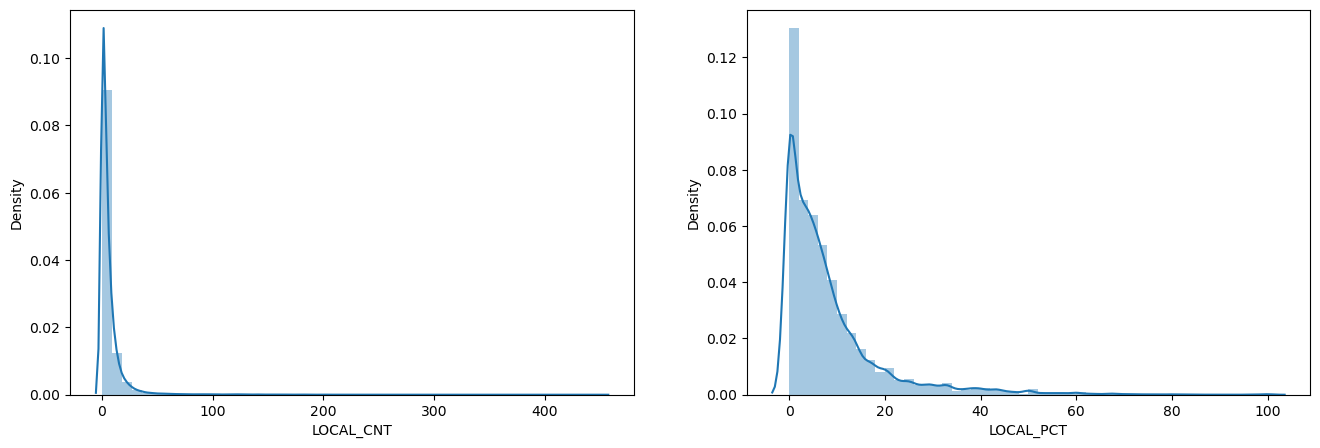

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dm['LOCAL_CNT'])
plt.subplot(1,2,2)
sns.distplot(dm['LOCAL_PCT'])
plt.show()

In [28]:
print("Highest allowed",dm['LOCAL_PCT'].mean() + 3*dm['LOCAL_PCT'].std())
print("Lowest allowed",dm['LOCAL_PCT'].mean() - 3*dm['LOCAL_PCT'].std())

Highest allowed 41.48411678404537
Lowest allowed -24.71843929634622


In [29]:
dm[(dm['LOCAL_PCT'] > 41.48) | (dm['LOCAL_PCT'] < -24.71)]
new_dm = dm[(dm['LOCAL_PCT'] < 41.48) & (dm['LOCAL_PCT'] > -24.71)]
new_dm

,DROPOUT_PCT,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_NAME,COUNTY_CODE,COUNTY_NAME,BOCES_CODE,BOCES_NAME,SUBGROUP_CODE,...,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT
0,25.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),1,...,660.0,465.0,70.0,60.0,9.0,10,2,0.0,0.0,163.0
1,21.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),2,...,335.0,255.0,76.0,29.0,9.0,1,0,0.0,0.0,70.0
2,29.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),3,...,325.0,210.0,65.0,31.0,10.0,9,3,0.0,0.0,93.0
4,25.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),5,...,369.0,252.0,68.0,40.0,11.0,7,2,0.0,0.0,94.0
5,31.0,2017-18,3,District,Albany city school district,1.0,Albany,190.0,Albany-schenectady-schoharie(capital region),6,...,90.0,59.0,66.0,7.0,8.0,1,1,0.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110825,0.0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,3,...,27.0,21.0,78.0,3.0,11.0,5,19,0.0,0.0,0.0
110828,3.0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,10,...,38.0,33.0,87.0,4.0,11.0,4,11,0.0,0.0,1.0
110829,11.0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,11,...,9.0,3.0,33.0,1.0,11.0,3,33,0.0,0.0,1.0
110831,6.0,2017-18,4,School,Dundee junior-senior high school,68.0,Yates,4390.0,Ontario-cayuga-seneca-wayne-yates(wayne-finger...,15,...,32.0,22.0,69.0,3.0,9.0,6,19,0.0,0.0,2.0


In [30]:
upper_limit = dm['LOCAL_PCT'].mean() + 3*dm['LOCAL_PCT'].std()
lower_limit = dm['LOCAL_PCT'].mean() - 3*dm['LOCAL_PCT'].std()

In [31]:
dm['LOCAL_PCT'].describe()

count    71743.000000
mean         8.382839
std         11.033759
min          0.000000
25%          1.000000
50%          5.000000
75%         11.000000
max        100.000000
Name: LOCAL_PCT, dtype: float64

In [32]:
##EDA

In [33]:
#model-1

In [34]:
##finding correlation using person method

<AxesSubplot:title={'center':'Person Correlation of Features'}>

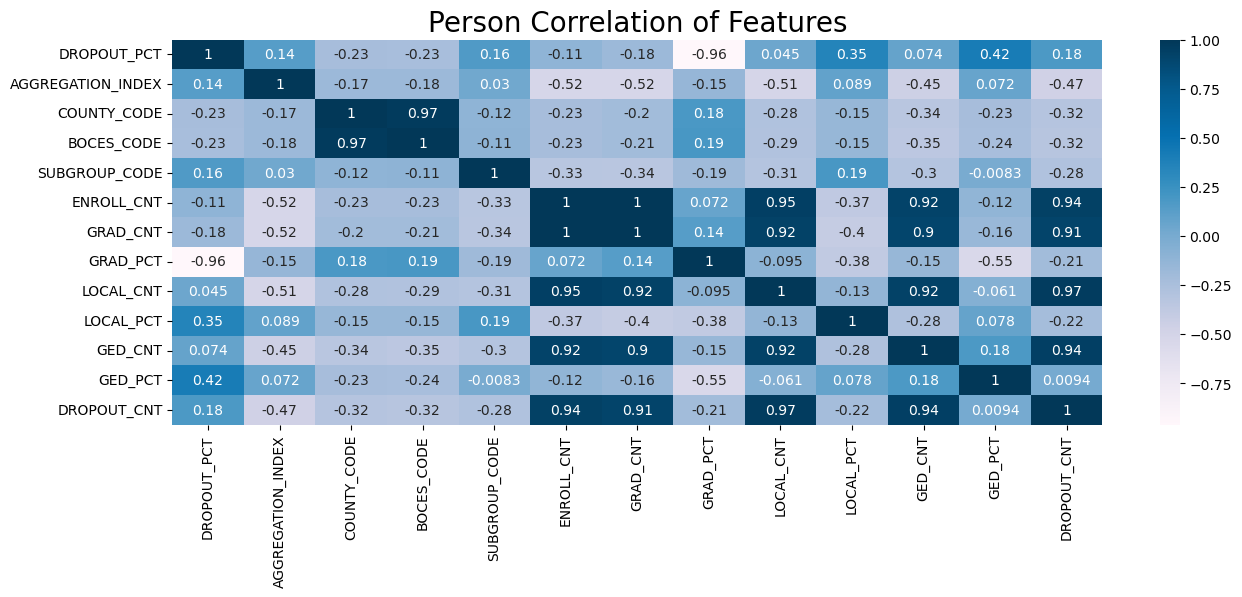

In [35]:
corr = dm.corr(method = 'pearson')
colormap = plt.cm.PuBu 
plt.figure(figsize=(15,5)) 
plt.title("Person Correlation of Features", y = 1, size = 20) 
sns.heatmap(corr.astype(float).corr(), linecolor = "white", cmap = colormap, annot = True)

In [36]:
##model-2

In [37]:
##The count of all is understood via the histogram

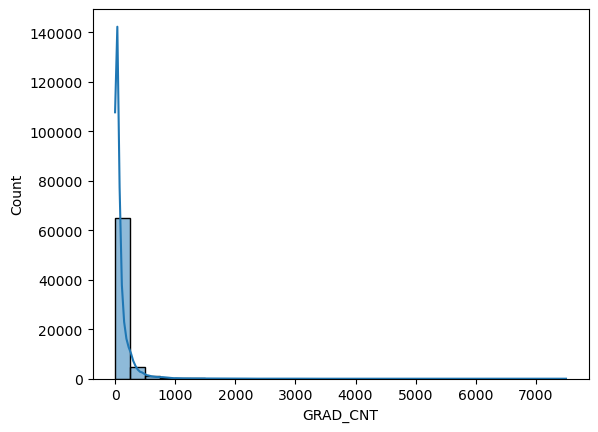

In [38]:
sns.histplot(dm['GRAD_CNT'],kde=True,bins=30)
plt.show()

In [39]:
##MODEL-3

In [40]:
 ##visualization to know how many above average

In [41]:
dm.info()
dm.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110834 entries, 0 to 110833
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DROPOUT_PCT         71743 non-null   float64
 1   REPORT_SCHOOL_YEAR  110834 non-null  object 
 2   AGGREGATION_INDEX   110834 non-null  int64  
 3   AGGREGATION_TYPE    110834 non-null  object 
 4   AGGREGATION_NAME    110834 non-null  object 
 5   COUNTY_CODE         110834 non-null  float64
 6   COUNTY_NAME         110834 non-null  object 
 7   BOCES_CODE          110834 non-null  float64
 8   BOCES_NAME          110834 non-null  object 
 9   SUBGROUP_CODE       110834 non-null  int64  
 10  SUBGROUP_NAME       110834 non-null  object 
 11  ENROLL_CNT          71743 non-null   float64
 12  GRAD_CNT            71743 non-null   float64
 13  GRAD_PCT            71743 non-null   float64
 14  LOCAL_CNT           71743 non-null   float64
 15  LOCAL_PCT           71743 non-null

,DROPOUT_PCT,AGGREGATION_INDEX,COUNTY_CODE,BOCES_CODE,SUBGROUP_CODE,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,GED_CNT,GED_PCT,DROPOUT_CNT
count,71743.000000,110834.000000,110834.000000,110834.000000,110834.000000,71743.000000,71743.000000,71743.000000,71743.000000,71743.000000,71743.000000,71743.000000,71743.000000
mean,8.458456,3.655728,34.974692,3431.541937,9.143458,121.950950,102.340200,81.963648,6.918097,8.382839,0.779407,0.683927,9.069637
std,11.011031,0.475132,17.635556,1700.622960,5.202226,264.486269,216.540825,19.560251,16.739034,11.033759,2.825279,1.969509,27.462429
min,0.000000,3.000000,1.000000,190.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,26.000000,2490.000000,5.000000,23.000000,18.000000,76.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,5.000000,4.000000,33.000000,3090.000000,9.000000,56.000000,45.000000,88.000000,3.000000,5.000000,0.000000,0.000000,3.000000
75%,12.000000,4.000000,49.000000,4590.000000,13.000000,122.000000,105.000000,95.000000,7.000000,11.000000,1.000000,0.000000,7.000000
max,100.000000,4.000000,68.000000,6690.000000,18.000000,9114.000000,7500.000000,100.000000,452.000000,100.000000,99.000000,43.000000,1006.000000


In [42]:
sns.set_palette('colorblind')

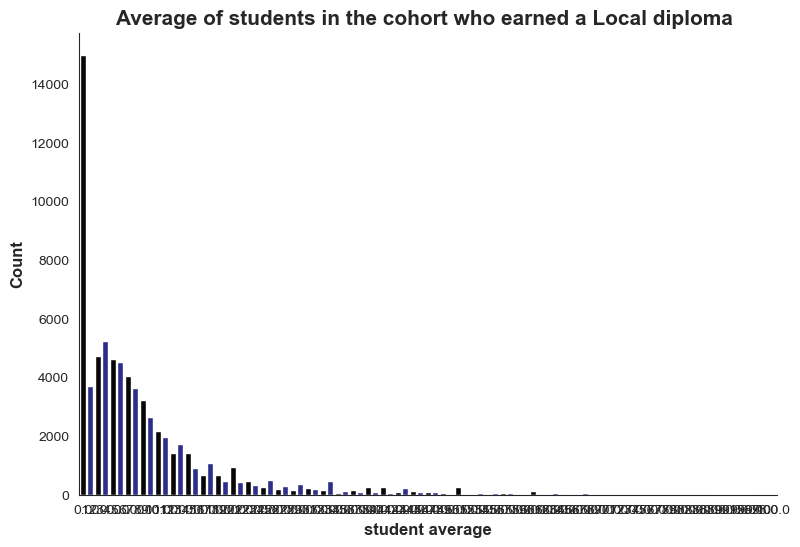

In [43]:

sns.set_style("white")
cols= ["#080707","#1D1F98"]
plt.figure(figsize=(9,6))
sns.countplot(x= dm['LOCAL_PCT'],palette=cols,)
plt.xlabel("student average", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.title("Average of students in the cohort who earned a Local diploma ", fontsize = 15, weight = "bold")
sns.despine() 
plt.show()
 
    

In [44]:
##model 4

In [45]:
##droupout rate in 2018

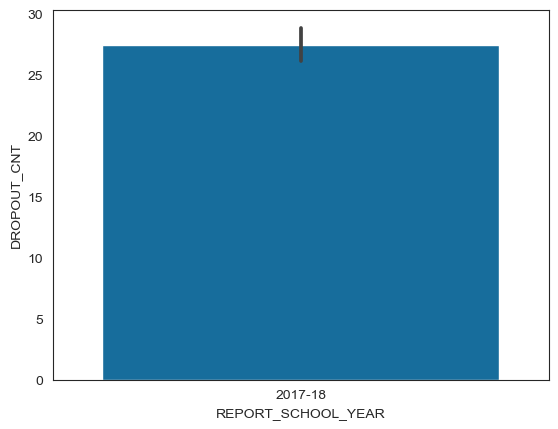

In [46]:
sns.barplot(x='REPORT_SCHOOL_YEAR',y='DROPOUT_CNT',data=dm,estimator=np.std)
plt.show()

In [47]:
##model 5

In [48]:
##Checking 'race, migrants and gender' using barplot

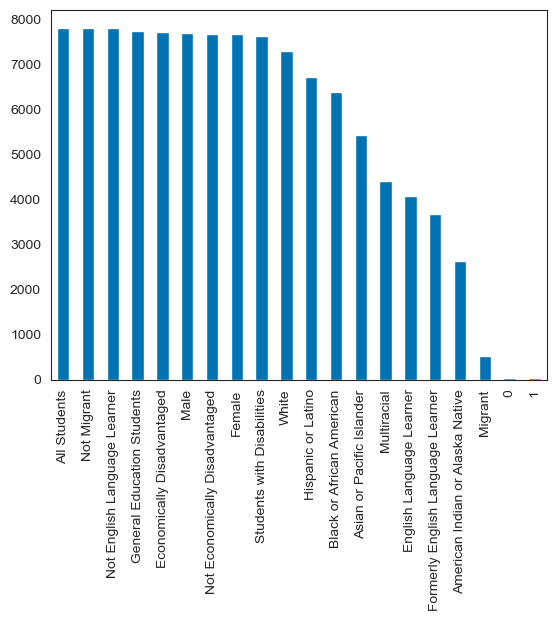

In [49]:
dm['SUBGROUP_NAME'].value_counts().plot(kind='bar')
plt.show()

In [50]:
#model 6

In [51]:
##the relationship among the local_cnt and the aggregation index using a cat plot.

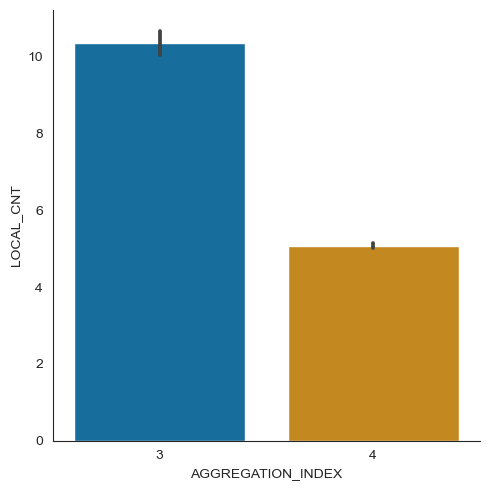

In [52]:
sns.catplot(x='AGGREGATION_INDEX',y='LOCAL_CNT',data=dm,kind='bar')
plt.show()

In [53]:
##model 7

In [54]:
#Comparison of Students with Local_cnt,Ged_cnt and Droupouts

Text(0, 0.5, 'Scale')

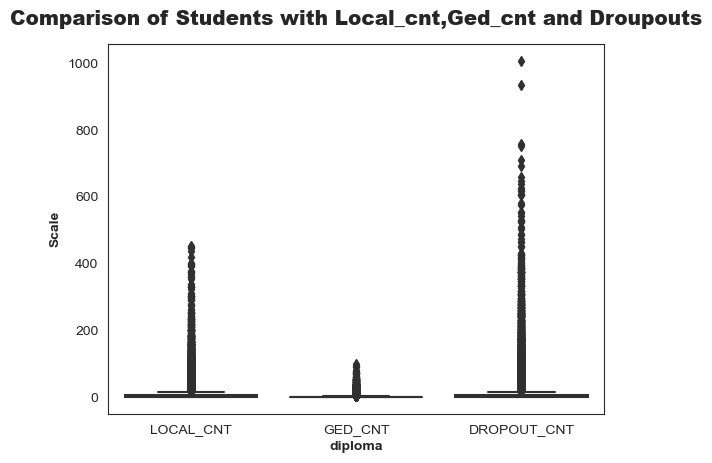

In [55]:
score = dm[['LOCAL_CNT', 'GED_CNT', 'DROPOUT_CNT']]

t_plot = sns.boxplot(data=score)

t_plot.set_title('Comparison of Students with Local_cnt,Ged_cnt and Droupouts', y=1.03,
                   fontweight='heavy', size='x-large')

t_plot.set_xlabel('diploma', fontweight='bold')
t_plot.set_ylabel('Scale', fontweight='bold')

In [56]:
##model 8

In [57]:
#Violin Plot:

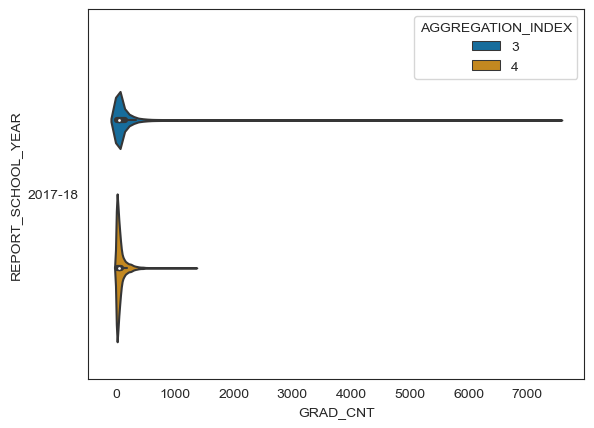

In [310]:
sns.violinplot(y='REPORT_SCHOOL_YEAR',x='GRAD_CNT',data=dm,hue='AGGREGATION_INDEX')
plt.show()

In [311]:
##model 9

Text(0.5, 1.0, 'Local_CNt Comparison with GED_CNT')

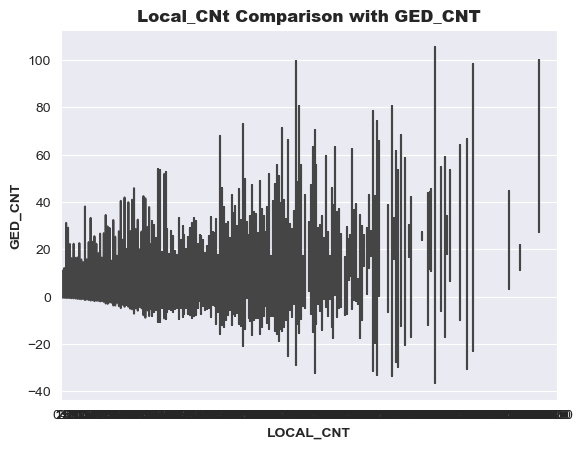

In [314]:
#Distinction in Local_CNt Comparison with GED_CNT
sns.set_style("darkgrid")

math_violin = sns.violinplot(data=dm, x='LOCAL_CNT', y='GED_CNT', inner='quartile', scale='count')

math_violin.set_xlabel('LOCAL_CNT', fontweight='bold')
math_violin.set_ylabel('GED_CNT', fontweight='bold')
math_violin.set_title('Local_CNt Comparison with GED_CNT', fontweight='heavy')

In [315]:
#model 10

In [ ]:
##Strip plot

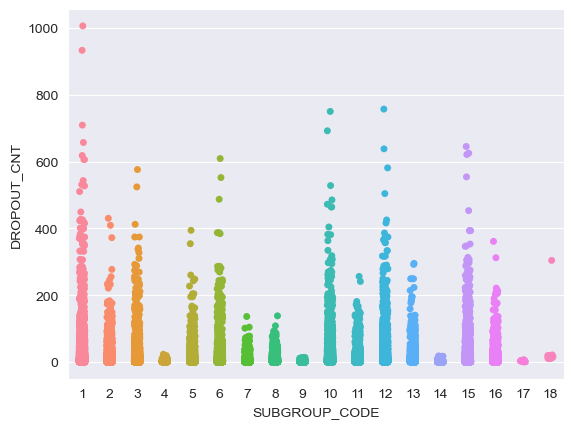

In [316]:
sns.stripplot(x='SUBGROUP_CODE',y='DROPOUT_CNT',data=dm,jitter=True,dodge=True)
plt.show()

In [ ]:
#model 11

In [ ]:
# heatmap

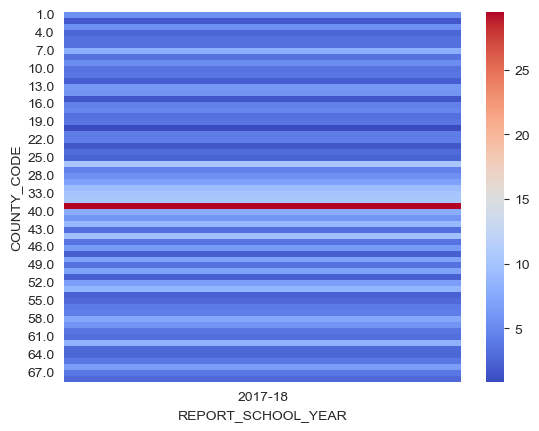

In [319]:
x= dm.pivot_table(index='COUNTY_CODE',columns='REPORT_SCHOOL_YEAR',values='LOCAL_CNT')
sns.heatmap(x,cmap='coolwarm')
plt.show()